# Building Multiple Linear regression model

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.decomposition import PCA


/kaggle/input/pcamlrdata/imputedData2018.csv


# Reading data and preprocessing

In [2]:
df=pd.read_csv('../input/pcamlrdata/imputedData2018.csv')

In [3]:
df=df.set_index('id')
df.head()

Estimate!!EMPLOYMENT STATUS!!Population 16 years and over  \
id                                                                                
1400000US36001000100                                             1505.0           
1400000US36001000200                                             3748.0           
1400000US36001000300                                             4816.0           
1400000US36001000401                                             2305.0           
1400000US36001000403                                             3756.0           

                      Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force  \
id                                                                                                
1400000US36001000100                                              930.0                           
1400000US36001000200                                             2519.0                           
1400000US36001000300                                             2894.0                           
1400000US36001000401                                             1000.0                           
1400000US36001000403                                             2747.0                           

                      Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Unemployed  \
id                                                                                                                                  
1400000US36001000100                                              113.0                                                             
1400000US36001000200                                              242.0                                                             
1400000US36001000300                                              296.0                                                             
1400000US36001000401                                               50.0                                                             
1400000US36001000403                                               78.0                                                             

                      Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Armed Forces  \
id                                                                                                              
1400000US36001000100                                                6.0                                         
1400000US36001000200                                                0.0                                         
1400000US36001000300                                                0.0                                         
1400000US36001000401                                                0.0                                         
1400000US36001000403                                                0.0                                         

                      Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!Not in labor force  \
id                                                                                                    
1400000US36001000100                                              575.0                               
1400000US36001000200                                             1229.0                               
1400000US36001000300                                             1922.0                               
1400000US36001000401                                             1305.0                               
1400000US36001000403                                             1009.0                               

                      Estimate!!EMPLOYMENT STATUS!!Civilian labor force  \
id                                                                        
1400000US36001000100                                              924.0   
1400000US36001000200                                             2519.0   


# Draw distributions for each feature
### We can observe that almost every feature is skewed to the right

In [4]:
df.hist(bins=20,figsize=(200,200))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf22527710>,
      dtype=object)

### Plot distribution of Target variable
#### Target variable is also right skewed and follows poisson distribution

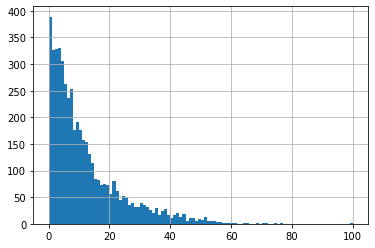

In [5]:
df['Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All families'].hist(bins=100)


# Define training and testing data

In [6]:
X=df.drop('Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All families',axis=1)
Y=df[['Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All families']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

## Scatter plot of predictor vs. target variable

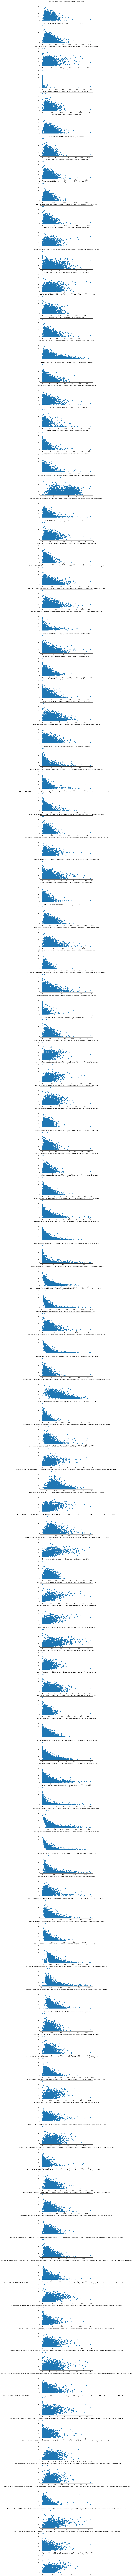

In [7]:
fig, axs = plt.subplots(X.shape[1])
fig.set_size_inches(10, 500)
j=0
for i in X.columns:
    axs[j].scatter(X[i], Y)
    axs[j].set_title(i)
    j+=1
fig.show()

# Data Transformation
##  Standardize and Normalize the data


In [8]:
# Standardization
scaler = StandardScaler()
# Normalization
mmscaler = MinMaxScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
mmscaler.fit(X_train)
X_train = mmscaler.transform(X_train)
X_test = mmscaler.transform(X_test)


# Building the MLR model

In [9]:
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)
y_predict = regression_model.predict(X_test)

# Summary of the model

In [10]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# Calculate R-squared
model_r2 = r2_score(y_test, y_predict)

# display the output
print("R-squared {:.3}".format(model_r2))
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

R-squared 0.781
MSE 30.8
MAE 3.1
RMSE 5.55


In [11]:
scaler1 = StandardScaler()
mmscaler = MinMaxScaler()
#pca1= PCA(0.95)
scaler1.fit(X)
X1 = scaler1.transform(X)
mmscaler.fit(X1)
X1 = mmscaler.transform(X1)

#pca1.fit(X1)
#X1= pca1.transform(X1)

In [12]:
X1=np.delete(X1,[1,5,6,7,8,9,10,11,12,13,15,19,20,22,23,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,57,58,59,63,65,66,67,69,77,81,82,83,84,85,86,88,91,93,95,96,97,98,99,100,102,103,104,105,106,107,110,112],1)
#X1=np.delete(X1,[21,27,35],1)

In [13]:
#print(X1)
X2 = sm.add_constant(X1)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()
print(est.summary())

                                                                                   OLS Regression Results                                                                                  
Dep. Variable:     Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All families   R-squared:                       0.821
Model:                                                                                                                                         OLS   Adj. R-squared:                  0.819
Method:                                                                                                                              Least Squares   F-statistic:                     595.9
Date:                                                                                                                             Mon, 30 Nov 2020   Prob (F-statistic):               0.00
Time:                                                       

## Residual plot

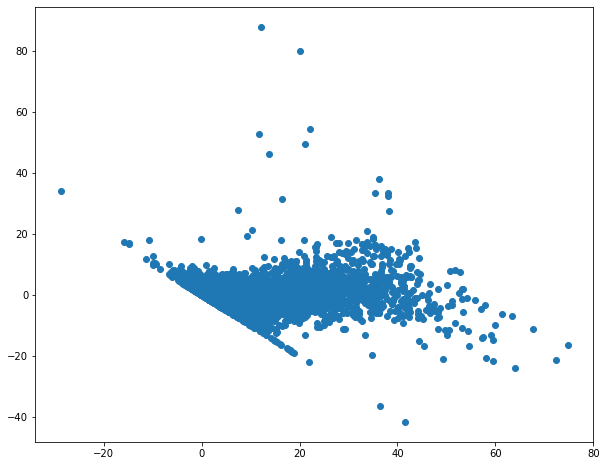

In [14]:
pred_val = est.fittedvalues.copy()
true_val = df['Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All families'].values.copy()
residual = true_val - pred_val
fig, ax = plt.subplots(figsize=(10,8))
_ = ax.scatter(pred_val,residual)

## P-P Plot

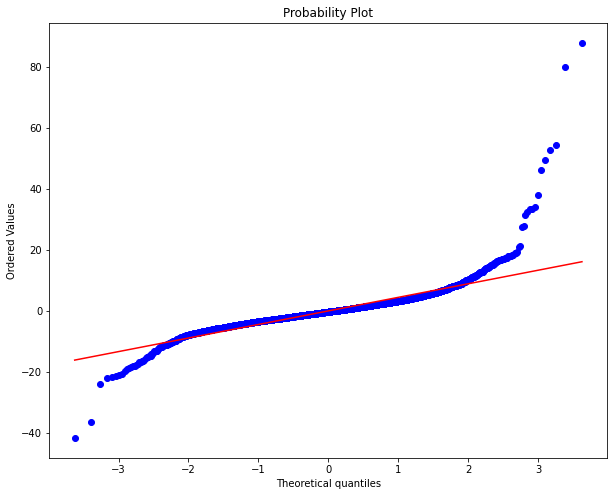

In [15]:
import scipy as sp
fig, ax = plt.subplots(figsize=(10,8))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

# MODEL WITHOUT INCOME PREDICTORS

In [16]:
cols = [c for c in df.columns if c.find('INCOME AND BENEFITS')==-1]
col2 = [c for c in df.columns if c.find('With Social Security')!=-1 or c.find('cash public assistance')!=-1 or c.find('SNAP benefits')!=-1]
cols=cols+col2
dfx=df[cols]
dfx.shape

(4851, 76)

In [17]:
X=dfx.drop('Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All families',axis=1)
Y=dfx[['Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All families']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [18]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

mmscaler = MinMaxScaler()
mmscaler.fit(X_train)
X_train = mmscaler.transform(X_train)
X_test = mmscaler.transform(X_test)

'''pca = PCA(0.95)
pca.fit(X_train)
X_train=pca.transform(X_train)
X_test=pca.transform(X_test)'''

X_train.shape

(3880, 75)

In [19]:
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)
y_predict = regression_model.predict(X_test)

In [20]:
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))
model_r2 = r2_score(y_test, y_predict)
print("R-squared:", model_r2)

MSE 44.5
MAE 4.23
RMSE 6.67
R-squared: 0.6839744091746993


In [21]:
scaler1 = StandardScaler()

#pca1= PCA(0.95)
scaler1.fit(X)
X1 = scaler1.transform(X)

mmscaler = MinMaxScaler()
mmscaler.fit(X1)
X1 = mmscaler.transform(X1)

#pca1.fit(X1)
#X1= pca1.transform(X1)

In [22]:
#X1=np.delete(X1,[9,10,12,13,14,19,20,21],1)

In [23]:
X2 = sm.add_constant(X1)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()
print(est.summary())

                                                                                   OLS Regression Results                                                                                  
Dep. Variable:     Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All families   R-squared:                       0.727
Model:                                                                                                                                         OLS   Adj. R-squared:                  0.723
Method:                                                                                                                              Least Squares   F-statistic:                     205.4
Date:                                                                                                                             Mon, 30 Nov 2020   Prob (F-statistic):               0.00
Time:                                                       

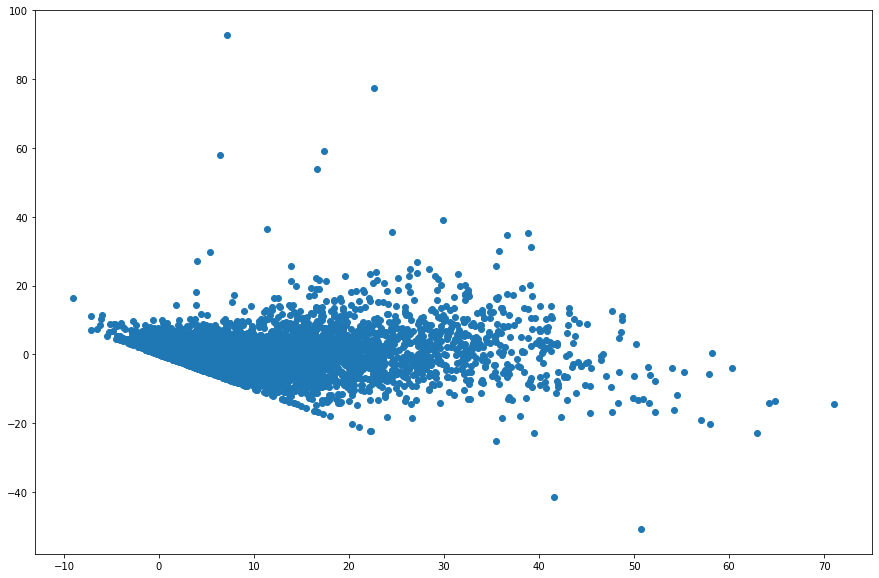

In [24]:
pred_val = est.fittedvalues.copy()
true_val = df['Percent Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All families'].values.copy()
residual = true_val - pred_val
fig, ax = plt.subplots(figsize=(15,10))
_ = ax.scatter(pred_val,residual)

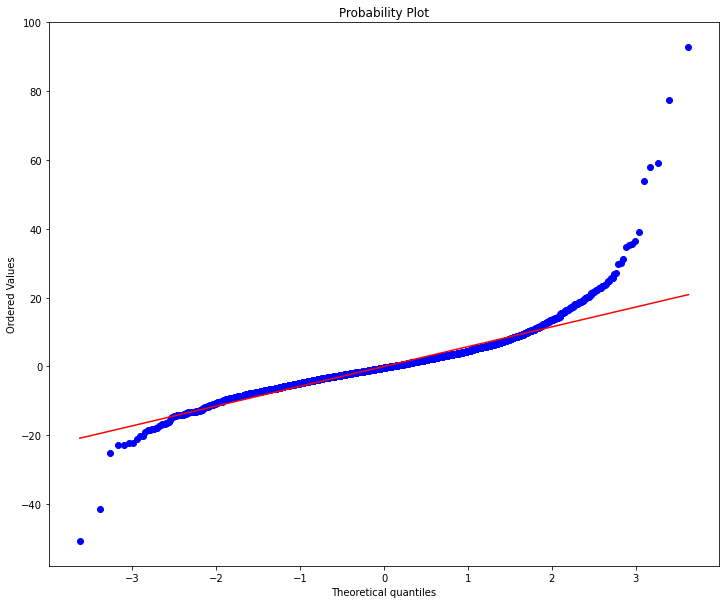

In [25]:
import scipy as sp
fig, ax = plt.subplots(figsize=(12,10))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)